# Reading the data

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\shine\Downloads\Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Checking for null values

In [2]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no null values in the data set

In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.shape

(178, 13)

# KMeans

C:\Users\shine\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


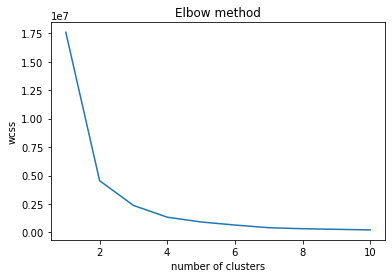

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss) 
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

By plotting the elbow graph we have found that the optimum number of clusters in the dataset is 4

# Fitting the model

In [6]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(df)
labels=kmeans.predict(df)
print(labels)


[0 0 2 2 1 2 2 2 0 0 2 2 2 0 2 2 2 0 2 0 1 1 0 0 0 0 2 2 0 0 2 2 0 2 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 2 0 2 2 2 0 0 0 2 2 3 1 3 1 3 3 1 3 3 1 1 0 3 3 0
 0 3 3 3 1 3 3 1 1 3 3 3 3 1 1 1 3 3 3 3 3 0 1 3 1 3 1 1 3 3 1 3 3 3 3 1 1
 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 1 1 3 1 1 1 1 1 3 1 1 1 1 3 1 0 0 3 1
 1 1 3 3 3 1 1 1 3 0 1 1 3 1 1 1 1 3 1 1 1 1 3 3 1 1 1 0 0 1]


In [7]:
kmeans.inertia_

1333139.2086165317

# Standard scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(scaler,kmeans)
pipe.fit(df)
labels_s=pipe.predict(df)
print(labels_s)

[2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 3 1 3 1 1 1 3 1 3 1 3
 3 1 1 1 3 3 1 1 1 0 3 1 1 1 1 1 1 1 1 3 3 3 3 1 3 3 1 1 3 1 1 1 1 1 1 3 3
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 1 3 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Checking the inertia value after scaling

In [9]:
kmeans.inertia_

1175.4283331033473

The inertia value has reduced.

# Plotting a dendrogram

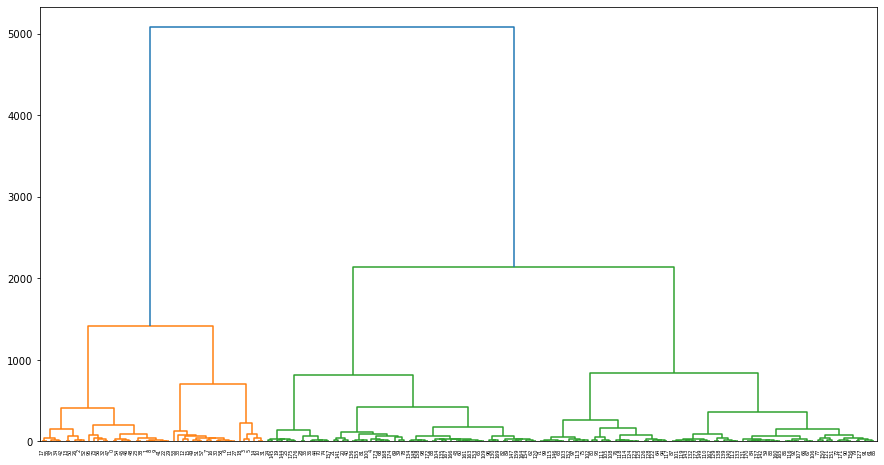

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
link=linkage(df,method="ward")
plt.figure(figsize=(15,8))
dendrogram(link,orientation='top',distance_sort="ascending",show_leaf_counts=True)
plt.show()

# Normalisation

In [12]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
df=norm.fit_transform(df)

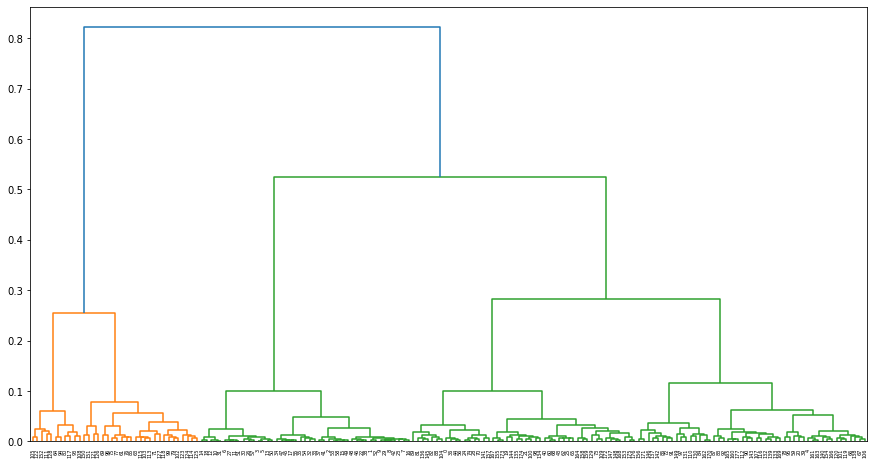

In [13]:
from scipy.cluster.hierarchy import dendrogram,linkage
link=linkage(df,method="ward")
plt.figure(figsize=(15,8))
dendrogram(link,orientation='top',distance_sort="ascending",show_leaf_counts=True)
plt.show()

# Agglomerative clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
labels=cluster.fit_predict(df)
labels

array([3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 0, 3, 0, 0, 3,
       1, 1, 3, 0, 3, 0, 1, 3, 3, 0, 0, 0, 1, 0, 0, 3, 3, 1, 1, 0, 1, 1,
       3, 3, 1, 1, 1, 0, 0, 1, 0, 1, 3, 0, 3, 1, 0, 0, 3, 0, 1, 1, 0, 3,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 0, 0, 0, 3,
       1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       3, 1], dtype=int64)

The optimum number of clusters is 4